In [1]:
import PIL.Image
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib, os
#https://www.tensorflow.org/tutorials/images/classification

In [2]:
data_dir = pathlib.Path("flowers")

image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

4317


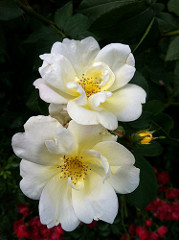

In [4]:
rose = list(data_dir.glob('rose/*'))
roseimshow = PIL.Image.open(str(rose[0]))
roseimshow

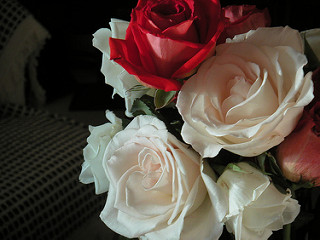

In [5]:
roseimshow1 = PIL.Image.open(str(rose[1]))
roseimshow1

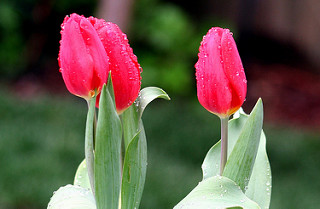

In [6]:
tulip = list(data_dir.glob('tulip/*'))
tulipimshow  = PIL.Image.open(str(tulip[0]))
tulipimshow

In [7]:
batch_size_ = 32
img_h = 180
img_w = 180

In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split =0.2,
    subset = "training",
    seed = 123,
    image_size = (img_h, img_w),
    batch_size = batch_size_)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset="validation",
    seed = 123,
    image_size = (img_h, img_w),
    batch_size=batch_size_
    )

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


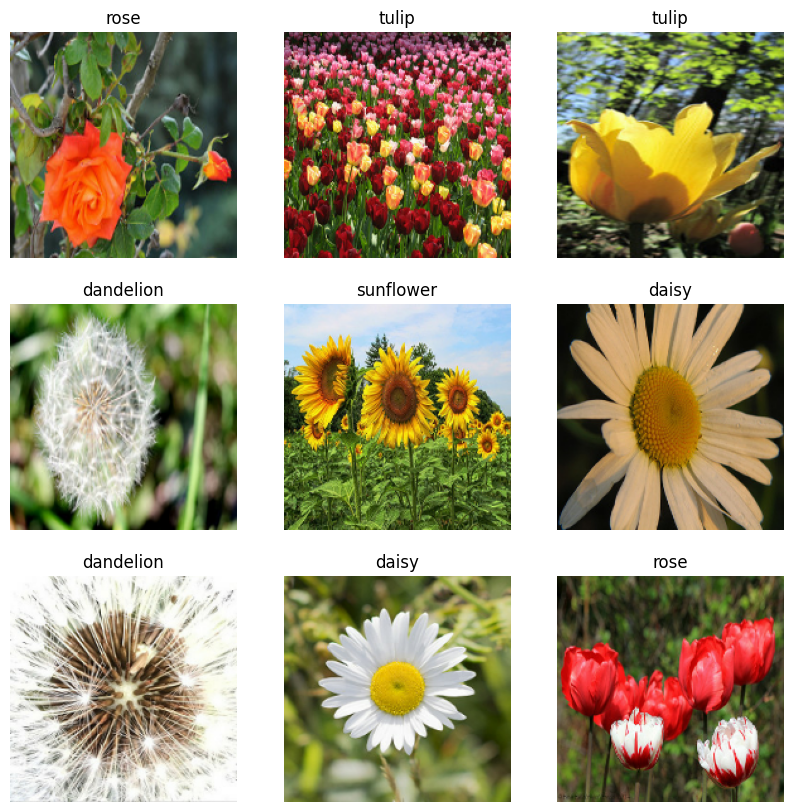

In [10]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

In [11]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [12]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [13]:
normalization_layer= layers.Rescaling(1./255)

In [14]:
normalized_ds = train_ds.map(lambda x, y:(normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

num_classes = len(class_names)

0.0 1.0


In [15]:
model = Sequential([
    layers.Rescaling(1./255, input_shape = (img_h, img_w, 3)),
    layers.Conv2D(16,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)])

In [16]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        

In [17]:
epoch= 10
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs = epoch)

Epoch 1/10


108/108 [==============================] - 16s 136ms/step - loss: 1.4172 - accuracy: 0.4143 - val_loss: 1.0871 - val_accuracy: 0.5295
Epoch 2/10
108/108 [==============================] - 14s 131ms/step - loss: 1.0639 - accuracy: 0.5799 - val_loss: 0.9669 - val_accuracy: 0.6060
Epoch 3/10
108/108 [==============================] - 13s 121ms/step - loss: 0.9089 - accuracy: 0.6482 - val_loss: 1.0121 - val_accuracy: 0.5933
Epoch 4/10
108/108 [==============================] - 12s 114ms/step - loss: 0.7224 - accuracy: 0.7302 - val_loss: 1.0473 - val_accuracy: 0.5979
Epoch 5/10
108/108 [==============================] - 12s 115ms/step - loss: 0.5324 - accuracy: 0.8086 - val_loss: 1.0210 - val_accuracy: 0.6443
Epoch 6/10
108/108 [==============================] - 13s 117ms/step - loss: 0.3543 - accuracy: 0.8781 - val_loss: 1.2001 - val_accuracy: 0.6431
Epoch 7/10
108/108 [==============================] - 12s 114ms/step - loss: 0.2200 - accuracy: 0.9276 - val_loss: 1.5544 - val_

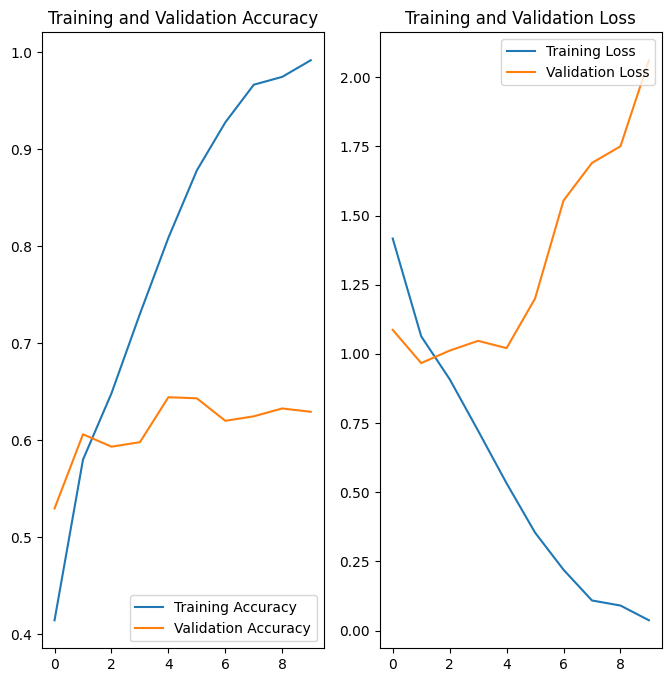

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epoch)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()